# Gold Standards - Mercedes Profile
Filter all Mercedes records from infringement_records.csv

In [17]:
import pandas as pd
import os

In [18]:
# Read the infringement records
input_file = 'Pranavh/outputs/infringement_records.csv'
df = pd.read_csv(input_file)
print(f"Total records: {len(df)}")
print(f"\nColumns: {df.columns.tolist()}")

Total records: 888

Columns: ['filename', 'year', 'team', 'driver', 'car_numbers', 'primary_car_number', 'infraction_types', 'primary_infraction', 'penalty_type', 'penalty_value', 'penalty_description', 'decision_text', 'text_length', 'document_number', 'date', 'time', 'session', 'race', 'team_confidence', 'extractive_summary']


In [19]:
# Check unique teams
print("Unique teams:")
print(df['team'].value_counts())

Unique teams:
team
AlphaTauri      144
Haas            115
Mercedes        102
Aston Martin     87
Alpine           86
Red Bull         81
Ferrari          81
Williams         73
Alfa Romeo       63
McLaren          56
Name: count, dtype: int64


In [20]:
# Filter for Mercedes records
mercedes_df = df[df['team'].str.contains('Mercedes', case=False, na=False)]
print(f"Mercedes records found: {len(mercedes_df)}")
print(f"\nMercedes records by year:")
print(mercedes_df['year'].value_counts().sort_index())

Mercedes records found: 102

Mercedes records by year:
year
2020    17
2021    24
2022    17
2023    21
2024    23
Name: count, dtype: int64


In [21]:
# Save to new CSV
output_file = 'Pranavh/outputs/mercedes_profile.csv'
mercedes_df.to_csv(output_file, index=False)
print(f"Created: {output_file}")
print(f"Total Mercedes records: {len(mercedes_df)}")

Created: Pranavh/outputs/mercedes_profile.csv
Total Mercedes records: 102


In [22]:
# Display first few records
print("\nFirst 5 Mercedes records:")
mercedes_df.head()


First 5 Mercedes records:


,filename,year,team,driver,car_numbers,primary_car_number,infraction_types,primary_infraction,penalty_type,penalty_value,penalty_description,decision_text,text_length,document_number,date,time,session,race,team_confidence,extractive_summary
11,2020 Italian Grand Prix - Parts and parameters...,2020,Mercedes,NaN,"[3, 4, 8, 11, 18, 20, 23, 26, 31, 44, 55, 77]",3.0,['other'],other,unknown,NaN,NaN,NaN,1260,41,06 September 2020,14:05,race,NaN,1.00,From The FIA Formula One Technical Delegate To...
24,2020 Austrian Grand Prix - Decision - Car 44 -...,2020,Mercedes,Lewis Hamilton,[44],44.0,['yellow_flags'],yellow_flags,no_action,NaN,No further action,No further action. Reason The Stewards heard f...,1437,33,04 July 2020,19:44,Qualifying,NaN,0.65,Decision No further action. The video footage ...
29,2020 Austrian Grand Prix - Offence - Car 44 - ...,2020,Mercedes,Lewis Hamilton,[44],44.0,['yellow_flags'],yellow_flags,unknown,NaN,NaN,33 in accordance with Art. 14 of the FIA Inter...,1631,42,05 July 2020,14:29,Qualifying,NaN,0.65,decision 33 in accordance with Art. 14 of the ...
39,2020 Austrian Grand Prix - Corrected Decision ...,2020,Mercedes,Valtteri Bottas,[77],77.0,['procedure'],procedure,unknown,NaN,NaN,- Protest - Car 77 Description Corrected Decis...,13766,23,04 July 2020,00:38,Practice,pdf\nGerd Ennser Felix Holter\nVitantonio Liuz...,0.65,Red Bull claimed in its protest that the car w...
44,2020 Austrian Grand Prix - Offence - Car 44 - ...,2020,Mercedes,Lewis Hamilton,[44],44.0,['track_limits'],track_limits,unknown,NaN,NaN,Deletion of lap time (1:16.208) in accordance ...,1358,18,03 July 2020,22:10,Race,NaN,0.65,Fact Car 44 did not use the track at the exit ...


In [23]:
# Summary statistics
print("\nMercedes Infringement Summary:")
print(f"Total infractions: {len(mercedes_df)}")
print(f"\nBy infraction type:")
print(mercedes_df['primary_infraction'].value_counts())
print(f"\nBy penalty type:")
print(mercedes_df['penalty_type'].value_counts())


Mercedes Infringement Summary:
Total infractions: 102

By infraction type:
primary_infraction
other             43
impeding          14
technical         10
track_limits       7
collision          7
speeding           7
procedure          6
yellow_flags       5
unsafe_release     3
Name: count, dtype: int64

By penalty type:
penalty_type
unknown             37
time_penalty        21
fine                17
no_action           13
reprimand            9
disqualification     3
grid_penalty         2
Name: count, dtype: int64


Year-wise breakdown by infraction type:
primary_infraction  collision  impeding  other  procedure  speeding  \
year                                                                  
2020                        0         0      8          3         0   
2021                        3         2     10          0         0   
2022                        2         5      4          1         2   
2023                        2         3      9          1         3   
2024                        0         4     12          1         2   

primary_infraction  technical  track_limits  unsafe_release  yellow_flags  
year                                                                       
2020                        0             3               0             3  
2021                        7             1               0             1  
2022                        2             0               1             0  
2023                        0             3               0             0  
2024  

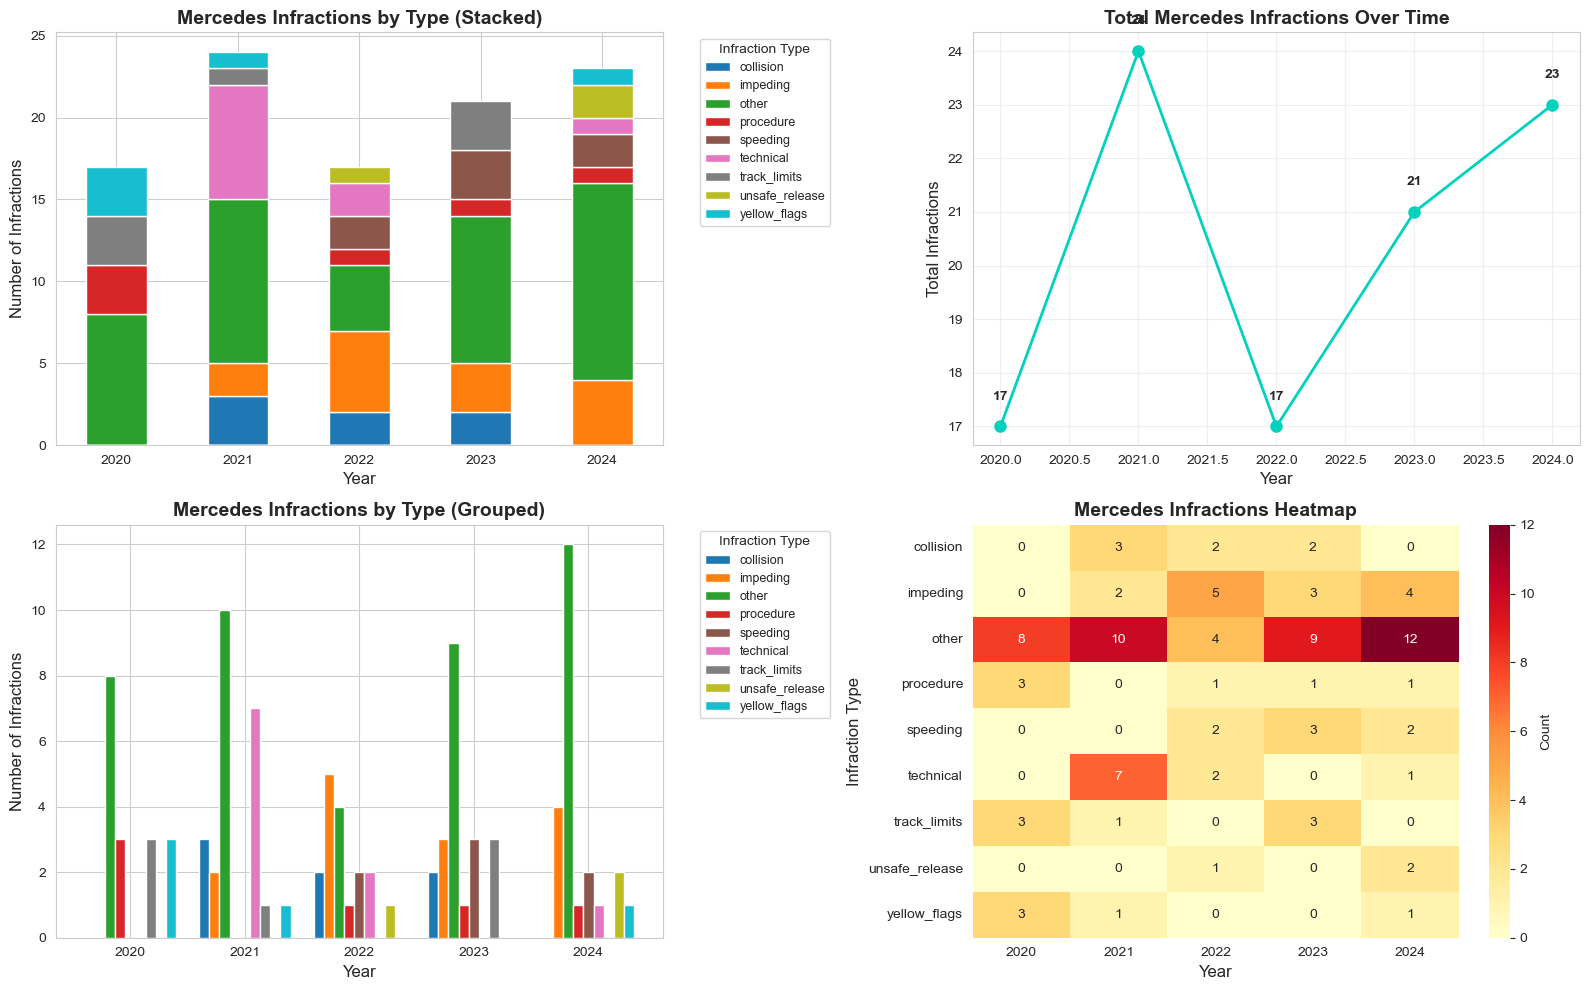


SUMMARY STATISTICS
Total Mercedes infractions (2020-2024): 102
Average infractions per year: 20.4
Year with most infractions: 2021 (24 infractions)
Year with least infractions: 2020 (17 infractions)


In [24]:
# Visualization: Mercedes infractions over time
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(16, 10))

# 1. Group data by year and primary_infraction
year_infraction = mercedes_df.groupby(['year', 'primary_infraction']).size().unstack(fill_value=0)
print("Year-wise breakdown by infraction type:")
print(year_infraction)
print("\n" + "="*80 + "\n")

# 2. Stacked bar chart - infraction types per year
plt.subplot(2, 2, 1)
year_infraction.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='tab10')
plt.title('Mercedes Infractions by Type (Stacked)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Infractions', fontsize=12)
plt.legend(title='Infraction Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.xticks(rotation=0)
plt.tight_layout()

# 3. Line chart - total infractions per year
plt.subplot(2, 2, 2)
total_by_year = mercedes_df.groupby('year').size()
plt.plot(total_by_year.index, total_by_year.values, marker='o', linewidth=2, markersize=8, color='#00D2BE')
plt.title('Total Mercedes Infractions Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Infractions', fontsize=12)
plt.grid(True, alpha=0.3)
for x, y in zip(total_by_year.index, total_by_year.values):
    plt.text(x, y + 0.5, str(y), ha='center', fontsize=10, fontweight='bold')

# 4. Regular (unstacked) bar chart for better comparison
plt.subplot(2, 2, 3)
year_infraction.plot(kind='bar', stacked=False, ax=plt.gca(), colormap='tab10', width=0.8)
plt.title('Mercedes Infractions by Type (Grouped)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Infractions', fontsize=12)
plt.legend(title='Infraction Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.xticks(rotation=0)
plt.tight_layout()

# 5. Heatmap
plt.subplot(2, 2, 4)
sns.heatmap(year_infraction.T, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Count'})
plt.title('Mercedes Infractions Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Infraction Type', fontsize=12)
plt.tight_layout()

plt.savefig('Pranavh/outputs/mercedes_infractions_visualization.png', dpi=300, bbox_inches='tight')
print("\nVisualization saved to: Pranavh/outputs/mercedes_infractions_visualization.png")
plt.show()

# Summary statistics
print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)
print(f"Total Mercedes infractions (2020-2024): {len(mercedes_df)}")
print(f"Average infractions per year: {len(mercedes_df)/5:.1f}")
print(f"Year with most infractions: {total_by_year.idxmax()} ({total_by_year.max()} infractions)")
print(f"Year with least infractions: {total_by_year.idxmin()} ({total_by_year.min()} infractions)")

# Hierarchical Summarization Workflow

Following GOLDSTANDARD.md specifications for 2-level hierarchical summarization:
- **Level 1:** Group by infraction type → 9 cluster summaries (300 words each)
- **Level 2:** Synthesize all clusters → 1 final team profile (200-250 words)

In [25]:
# CELL 1: Group Data by Infraction Type

# Group all 102 Mercedes documents by primary_infraction type
infraction_groups_list = []

for infraction_type in mercedes_df['primary_infraction'].unique():
    # Filter documents for this infraction type
    group_docs = mercedes_df[mercedes_df['primary_infraction'] == infraction_type]
    
    # Format each document
    documents_text = ""
    for idx, row in group_docs.iterrows():
        doc_num = row.get('document_number', 'N/A')
        date = row.get('date', 'N/A')
        driver = row.get('driver', 'Unknown')
        car_num = row.get('primary_car_number', 'N/A')
        penalty_desc = row.get('penalty_description', 'N/A')
        decision = row.get('decision_text', 'N/A')
        
        documents_text += f"""Document {doc_num} | {date} | {driver} (Car {car_num})
Penalty: {penalty_desc}
Details: {decision}
---

"""
    
    infraction_groups_list.append({
        'infraction_type': infraction_type,
        'document_count': len(group_docs),
        'documents_text': documents_text
    })

# Create dataframe
infraction_groups = pd.DataFrame(infraction_groups_list)

# Display results
print(f"Number of unique infraction types: {len(infraction_groups)}")
print(f"\nDocument count per infraction type:")
print(infraction_groups[['infraction_type', 'document_count']].sort_values('document_count', ascending=False))

# Preview
print(f"\n{'='*80}")
print("Preview of first 500 characters from 'other' infractions:")
print('='*80)
other_preview = infraction_groups[infraction_groups['infraction_type'] == 'other']['documents_text'].iloc[0][:500]
print(other_preview)

# Save to CSV
output_path = 'Pranavh/outputs/goldstandards/infraction_groups.csv'
infraction_groups.to_csv(output_path, index=False)
print(f"\n✅ Saved to: {output_path}")

Number of unique infraction types: 9

Document count per infraction type:
  infraction_type  document_count
0           other              43
5        impeding              14
4       technical              10
3    track_limits               7
6       collision               7
8        speeding               7
2       procedure               6
1    yellow_flags               5
7  unsafe_release               3

Preview of first 500 characters from 'other' infractions:
Document 41 | 06 September 2020 | nan (Car 3.0)
Penalty: nan
Details: nan
---

Document 41 | 05 July 2020 | Lewis Hamilton (Car 44.0)
Penalty: nan
Details: made by the Stewards at the 2020 Austrian Grand Prix Competition: Document 33 2020 Austrian Grand Prix. The Stewards, summoned the team (Document 39) and held a hearing at 13:45 on Sunday 5th July, 2020. The Stewards heard the driver and the team representative. The Stewards determine that the additional video evidence represents a significan

✅ Saved to: Pranavh/outpu

In [32]:
# CELL 2: Create Function to Generate Cluster Summaries

import os
from openai import OpenAI
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Initialize OpenAI client
# Make sure your .env file contains: OPENAI_API_KEY=your_actual_key
client = OpenAI(api_key=os.getenv('OPENAI_API_KEY'))

def generate_cluster_summary(infraction_type, count, documents_text):
    """
    Generate a 300-word cluster summary for a specific infraction type.
    
    Args:
        infraction_type (str): Type of infraction
        count (int): Number of incidents
        documents_text (str): Combined text of all documents in this cluster
    
    Returns:
        str: 300-word summary generated by LLM
    """
    
    # Create the prompt
#     prompt = f"""Below are all Mercedes FIA steward decisions for {infraction_type} infractions ({count} total incidents):

# {documents_text}

# Based on these {count} incidents, create a comprehensive summary (exactly 300 words) analyzing:
# 1. Common scenarios and circumstances (when/where these infractions occur)
# 2. Drivers most frequently involved (with specific counts)
# 3. Typical penalties applied (ranges and averages)
# 4. Patterns over time (any changes across seasons/years)
# 5. Notable or recurring situations
# 6. Key statistics (percentages, frequencies)

# Be factual, objective, and data-driven. Include specific numbers and trends."""


    prompt = f"""Below are all Mercedes FIA steward decisions for {infraction_type} infractions ({count} total incidents):

    {documents_text}

    Create a statistical narrative summary (exactly 200 words) as a flowing paragraph with embedded data.

    Write in this style for your reference - this is a example prompt:
    "The {infraction_type} infractions accounted for {count} incidents, representing percentage% of all Mercedes violations between 2020 and 2024. Driver [car_number] was involved in [#] of these incidents ([%]%), followed by Driver [car_number] with [#] incidents ([%]%). The most common penalty for this infraction type was [penalty], applied in [#] cases ([%]%), while [penalty] was given [#] times ([%]%). In terms of temporal distribution, the peak year was [year] with [#] incidents, whereas [year] saw only [#] cases. The infractions showed a [increasing/decreasing] trend from 2020 ([#] incidents) through 2024 ([#] incidents), representing a [%]% change. Session-wise, [#]% occurred during race sessions, [#]% during qualifying, and [#]% in practice. Common scenarios extracted from the decisions include [describe top 3 patterns with frequencies]. The average penalty severity was [calculation if applicable]."

    CRITICAL RULES:
    - Write as continuous flowing paragraphs, NOT bullet points or sections
    - Embed ALL statistics naturally within sentences
    - Include exact counts and percentages throughout
    - Use transition words (whereas, while, furthermore, additionally)
    - No strategic insights or interpretations
    - Pure factual narrative with numbers woven into prose
    - All numbers must be extractable from source documents"""


    
    try:
        # Call OpenAI API
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[
                {"role": "system", "content": "You are an expert F1 analyst specializing in steward decisions and team performance analysis."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.3,
            max_tokens=500
        )
        
        summary = response.choices[0].message.content
        return summary
        
    except Exception as e:
        print(f"Error calling OpenAI API: {e}")
        return f"[ERROR: Could not generate summary - {str(e)}]"

# Test with one example
print("Function created successfully!")
print("\n" + "="*80)
print("EXAMPLE PROMPT for 'impeding' infractions:")
print("="*80)
test_type = infraction_groups.iloc[0]['infraction_type']
test_count = infraction_groups.iloc[0]['document_count']
test_docs = infraction_groups.iloc[0]['documents_text'][:1000]  # First 1000 chars

example_prompt = f"""Below are all Mercedes FIA steward decisions for {test_type} infractions ({test_count} total incidents):

{test_docs}...

Based on these {test_count} incidents, create a comprehensive summary (exactly 300 words) analyzing:
1. Common scenarios and circumstances (when/where these infractions occur)
2. Drivers most frequently involved (with specific counts)
3. Typical penalties applied (ranges and averages)
4. Patterns over time (any changes across seasons/years)
5. Notable or recurring situations
6. Key statistics (percentages, frequencies)

Be factual, objective, and data-driven. Include specific numbers and trends."""

print(example_prompt[:800] + "...")

Function created successfully!

EXAMPLE PROMPT for 'impeding' infractions:
Below are all Mercedes FIA steward decisions for other infractions (43 total incidents):

Document 41 | 06 September 2020 | nan (Car 3.0)
Penalty: nan
Details: nan
---

Document 41 | 05 July 2020 | Lewis Hamilton (Car 44.0)
Penalty: nan
Details: made by the Stewards at the 2020 Austrian Grand Prix Competition: Document 33 2020 Austrian Grand Prix. The Stewards, summoned the team (Document 39) and held a hearing at 13:45 on Sunday 5th July, 2020. The Stewards heard the driver and the team representative. The Stewards determine that the additional video evidence represents a significant and relevant new element which was unavailable to the parties at the time of the competition concerned. Reasons: During the initial hearing, no on-board
---

Document 47 | 27 September 2020 | nan (Car nan)
Pe...


In [33]:
# CELL 3: Generate All Level 1 Cluster Summaries

from datetime import datetime
import time

# Load the infraction groups from CSV (from Cell 1)
infraction_groups = pd.read_csv('Pranavh/outputs/goldstandards/infraction_groups.csv')

# Generate summaries for all infraction types
results = []

print("Generating Level 1 cluster summaries...")
print("="*80)

for idx, row in infraction_groups.iterrows():
    infraction_type = row['infraction_type']
    document_count = row['document_count']
    documents_text = row['documents_text']
    
    print(f"\n[{idx+1}/{len(infraction_groups)}] Processing: {infraction_type} ({document_count} documents)")
    
    # Generate summary
    summary = generate_cluster_summary(infraction_type, document_count, documents_text)
    
    # Calculate word count
    word_count = len(summary.split())
    
    results.append({
        'infraction_type': infraction_type,
        'document_count': document_count,
        'summary': summary,
        'word_count': word_count,
        'model_used': 'gpt-4',
        'generation_timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    })
    
    print(f"   ✓ Generated summary: {word_count} words")
    
    # Sleep to avoid rate limits
    time.sleep(1)

# Create results dataframe
level1_summaries = pd.DataFrame(results)

# Display results
print("\n" + "="*80)
print("LEVEL 1 CLUSTER SUMMARIES COMPLETE")
print("="*80)
print(f"\nTotal summaries generated: {len(level1_summaries)}")
print(f"\nWord count statistics:")
print(level1_summaries['word_count'].describe())

print(f"\n{'='*80}")
print("Summary breakdown:")
print('='*80)
print(level1_summaries[['infraction_type', 'document_count', 'word_count']])

# Display one full example
print(f"\n{'='*80}")
print(f"EXAMPLE SUMMARY: {level1_summaries.iloc[0]['infraction_type']}")
print('='*80)
print(level1_summaries.iloc[0]['summary'])

# Save to CSV
output_path = 'Pranavh/outputs/goldstandards/level1_cluster_summaries.csv'
level1_summaries.to_csv(output_path, index=False)
print(f"\n✅ Saved to: {output_path}")

Generating Level 1 cluster summaries...

[1/9] Processing: other (43 documents)
   ✓ Generated summary: 179 words

[2/9] Processing: yellow_flags (5 documents)
   ✓ Generated summary: 177 words

[3/9] Processing: procedure (6 documents)
   ✓ Generated summary: 166 words

[4/9] Processing: track_limits (7 documents)
   ✓ Generated summary: 179 words

[5/9] Processing: technical (10 documents)
   ✓ Generated summary: 183 words

[6/9] Processing: impeding (14 documents)
   ✓ Generated summary: 192 words

[7/9] Processing: collision (7 documents)
   ✓ Generated summary: 183 words

[8/9] Processing: unsafe_release (3 documents)
   ✓ Generated summary: 164 words

[9/9] Processing: speeding (7 documents)
   ✓ Generated summary: 185 words

LEVEL 1 CLUSTER SUMMARIES COMPLETE

Total summaries generated: 9

Word count statistics:
count      9.000000
mean     178.666667
std        8.902247
min      164.000000
25%      177.000000
50%      179.000000
75%      183.000000
max      192.000000
Name: wor

In [ ]:
# CELL 4: Generate Final Team Profile (Level 2)

def generate_final_profile(cluster_summaries_df):
    """
    Generate final Mercedes team profile by synthesizing all cluster summaries.
    
    Args:
        cluster_summaries_df (DataFrame): Level 1 cluster summaries
    
    Returns:
        str: Final team profile (200-250 words)
    """
    
    # Build the Level 2 prompt
    prompt = f"""Below are comprehensive summaries of Mercedes F1 Team's infractions, organized by infraction type (102 total incidents):

"""
    
    for idx, row in cluster_summaries_df.iterrows():
        prompt += f"""{row['infraction_type'].upper()} INFRACTIONS ({row['document_count']} incidents):
{row['summary']}

---

"""
    
    prompt += """Based on these detailed infraction analyses, create a final comprehensive Mercedes F1 Team profile (200-250 words) that provides:

1. EXECUTIVE SUMMARY: Overall infringement landscape (2-3 sentences)
2. KEY PATTERNS: Most significant infraction categories and their characteristics
3. DRIVER ANALYSIS: Notable driver involvement patterns
4. SEVERITY TRENDS: Penalty patterns and changes over time
5. STRATEGIC INSIGHTS: What these patterns reveal about the team

Be concise, analytical, and objective. Focus on the big picture while citing specific statistics."""
    
    try:
        # Call OpenAI API
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[
                {"role": "system", "content": "You are an expert F1 analyst creating executive summaries of team performance and infringement patterns."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.3,
            max_tokens=400
        )
        
        final_summary = response.choices[0].message.content
        return final_summary, prompt
        
    except Exception as e:
        print(f"Error calling OpenAI API: {e}")
        return f"[ERROR: Could not generate final profile - {str(e)}]", prompt

# Load Level 1 summaries
level1_summaries = pd.read_csv('Pranavh/outputs/goldstandards/level1_cluster_summaries.csv')

print("Generating Level 2 final team profile...")
print("="*80)

# Generate final profile
final_summary, full_prompt = generate_final_profile(level1_summaries)

# Calculate word count
final_word_count = len(final_summary.split())

# Display prompt preview
print("\nLevel 2 Prompt (first 1000 characters):")
print("="*80)
print(full_prompt[:1000] + "...\n")

# Display final profile
print("\n" + "="*80)
print("FINAL MERCEDES F1 TEAM PROFILE")
print("="*80)
print(final_summary)
print("\n" + "="*80)
print(f"Word count: {final_word_count} words")
print("="*80)

# Save to CSV
final_profile_data = pd.DataFrame([{
    'model_used': 'gpt-4',
    'summary': final_summary,
    'word_count': final_word_count,
    'generation_timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
}])

csv_output = 'Pranavh/outputs/goldstandards/level2_final_profile.csv'
final_profile_data.to_csv(csv_output, index=False)
print(f"\n✅ Saved CSV to: {csv_output}")

# Save text version
txt_output = 'Pranavh/outputs/goldstandards/final_mercedes_profile.txt'
with open(txt_output, 'w') as f:
    f.write(final_summary)
print(f"✅ Saved text to: {txt_output}")

print("\n" + "="*80)
print("ALL FILES GENERATED:")
print("="*80)
print("✅ Pranavh/outputs/goldstandards/infraction_groups.csv")
print("✅ Pranavh/outputs/goldstandards/level1_cluster_summaries.csv")
print("✅ Pranavh/outputs/goldstandards/level2_final_profile.csv")
print("✅ Pranavh/outputs/goldstandards/final_mercedes_profile.txt")
print("="*80)

Generating Level 2 final team profile...


NameError: name 'all_cluster_summaries' is not defined